<a href="https://colab.research.google.com/github/GeraDLC/consumer_spending_prediction/blob/main/Consumer_Spending_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

#**1. Configuración del Ambiente**


---




In [1]:
!pip install wget
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load
from pandas import json_normalize
global df_traffic, resultados, modelo, modelo_clasificacion

#**2. Preprocesamiento de Datos**


---


In [2]:
#Importando la base de datos
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df_traffic.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [3]:
#Primer vistazo a la BD
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [4]:
#Función preprocesamiento
def preprocesamiento():

  #Variables Globales
  global df_traffic

  #Diccionario de columnas
  diccionarios = ['device','geoNetwork','trafficSource','totals']

  #Extraer info de columnas y crear nuevas columnas
  for columna in diccionarios:
    df_traffic = df_traffic.join(pd.DataFrame([json.loads(linea) for linea in df_traffic[columna]]))

  # Eliminar las columnas originales que contenían diccionarios
  df_traffic = df_traffic.drop(diccionarios, axis=1)
  df_traffic = df_traffic.drop('adwordsClickInfo', axis = 1)

  #Eliminar columnas que solo tienen un valor único
  for columna in df_traffic.columns:
    if len(df_traffic[columna].unique()) == 1:
        df_traffic = df_traffic.drop(columns=[columna], axis = 1)

  #Eliminar registros duplicados
  df_traffic = df_traffic.drop_duplicates()

  #Eliminar columnas no relevantes (muchos nulos o no informacion relevante para mí)
  df_traffic = df_traffic.drop(['adContent', 'isTrueDirect', 'keyword', 'subContinent','networkDomain','continent','referralPath'], axis = 1)

  #Reemplazo de str por int o float
  objetos = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']
  for columna in objetos:
      df_traffic[columna] = pd.to_numeric(df_traffic[columna])

  #Sustituir nulos por cero
  df_traffic[objetos] = df_traffic[objetos].fillna(0)

  #Dividir la variable objetivo por 1M
  df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'] / 1000000

  #Convertir 'date' a Datetime
  df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
  df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')

  #Convertir columna uint a str
  df_traffic['fullVisitorId'] = df_traffic['fullVisitorId'].apply(str)
  df_traffic['visitId'] = df_traffic['visitId'].apply(str)

  df_traffic['isMobile'] = df_traffic['isMobile'].astype(int)

In [5]:
#Funcion para preprocesamiento de datos
preprocesamiento()

In [6]:
df_traffic = df_traffic.drop(['campaignCode'], axis=1)
df_traffic

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,country,region,metro,city,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,2016-09-02 08:23:27,Chrome,Windows,0,desktop,Singapore,(not set),(not set),Singapore,(not set),google,organic,1,1,1.0,1.0,0.0
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,2016-09-02 17:05:28,Chrome,Macintosh,0,desktop,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,1,1,1.0,1.0,0.0
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,2016-09-02 22:53:22,Chrome,Macintosh,0,desktop,Argentina,Buenos Aires,(not set),Buenos Aires,Data Share Promo,Partners,affiliate,1,1,1.0,1.0,0.0
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,2016-09-03 05:14:09,Safari,iOS,1,mobile,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,1,1,1.0,0.0,0.0
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,2016-09-02 15:21:11,Safari,iOS,1,mobile,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,5,4,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,2017-01-04,7330357551242339916,7330357551242339916_1483540608,1483540608,1,2017-01-04 14:36:48,Chrome,Windows,0,desktop,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),youtube.com,referral,1,1,1.0,1.0,0.0
12279,Social,2017-01-04,696320405243257438,0696320405243257438_1483580407,1483580407,1,2017-01-05 01:40:07,Chrome,Android,1,mobile,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),youtube.com,referral,1,1,1.0,1.0,0.0
12280,Social,2017-01-04,5437703324867866371,5437703324867866371_1483592122,1483592122,1,2017-01-05 04:55:22,Chrome,Linux,0,desktop,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),youtube.com,referral,1,1,1.0,1.0,0.0
12281,Social,2017-01-04,8869363093179043393,8869363093179043393_1483601927,1483601927,2,2017-01-05 07:38:47,Chrome,Android,1,mobile,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),youtube.com,referral,2,2,0.0,0.0,0.0


In [7]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   date                12283 non-null  datetime64[ns]
 2   fullVisitorId       12283 non-null  object        
 3   sessionId           12283 non-null  object        
 4   visitId             12283 non-null  object        
 5   visitNumber         12283 non-null  int64         
 6   visitStartTime      12283 non-null  datetime64[ns]
 7   browser             12283 non-null  object        
 8   operatingSystem     12283 non-null  object        
 9   isMobile            12283 non-null  int64         
 10  deviceCategory      12283 non-null  object        
 11  country             12283 non-null  object        
 12  region              12283 non-null  object        
 13  metro               12283 non-null  object    

#**3. Exploración y Feature Engineering**


---


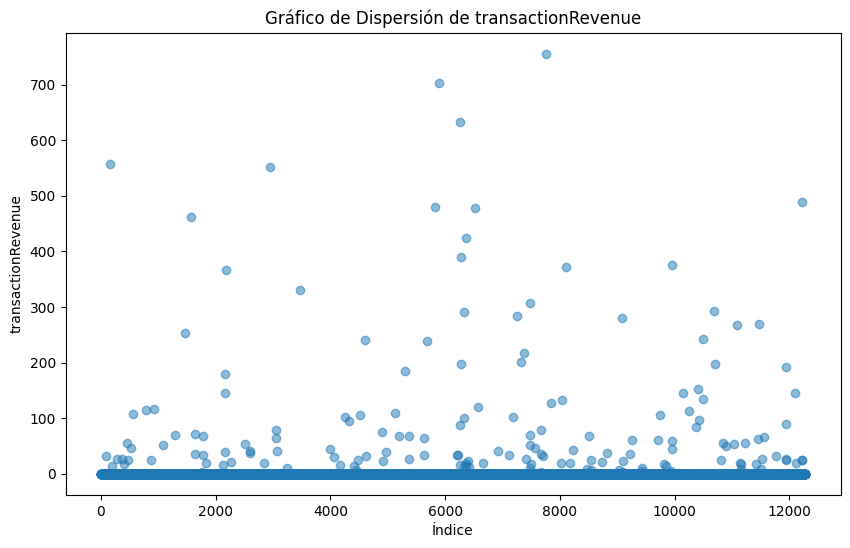

In [8]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: ylabel='transactionRevenue'>

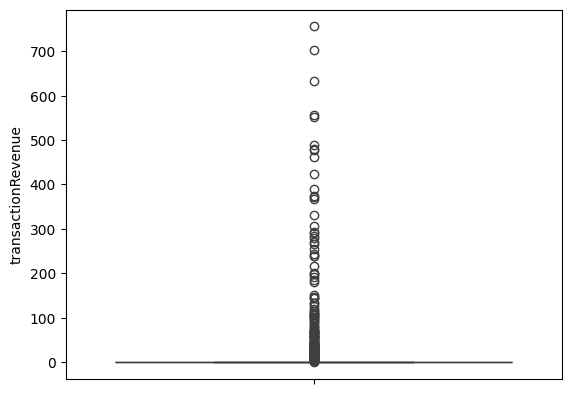

In [9]:
sns.boxplot(df_traffic.transactionRevenue)

Los Outliers son consecuencia de las personas que hicieron alguna compra, ya que son muy pocas, el boxplot los detecta como outliers, ya que la concentración de valores está en 0.

In [10]:
df_traffic.describe()

,visitNumber,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,1.923390,0.269071,4.637141,3.871286,0.502483,0.768949,1.447871
std,5.878228,0.443495,10.136882,7.273662,0.500014,0.421522,20.893896
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,195.000000,1.000000,471.000000,305.000000,1.000000,1.000000,755.630000


Podemos observar que existen demasiados valores cero en transaction.Revenue, esto quiere decir que la minoría de los registros realizaron alguna compra. **Esto es un problema de 80/20**: Nos indica que la minoría de los clientes son los que mas contribuyen a las transacciones.


Veamos cual es la proporcion porcentual en el transactionReveue:

In [11]:
conteo = df_traffic['transactionRevenue'].value_counts().sort_values(ascending=False)
conteo

0.00      12119
33.59         3
19.19         3
13.59         3
4.99          2
          ...  
7.99          1
269.55        1
62.05         1
8.48          1
25.24         1
Name: transactionRevenue, Length: 147, dtype: int64

Transacciones Igual a cero: 12119
Transacciones Mayores a Cero: 164


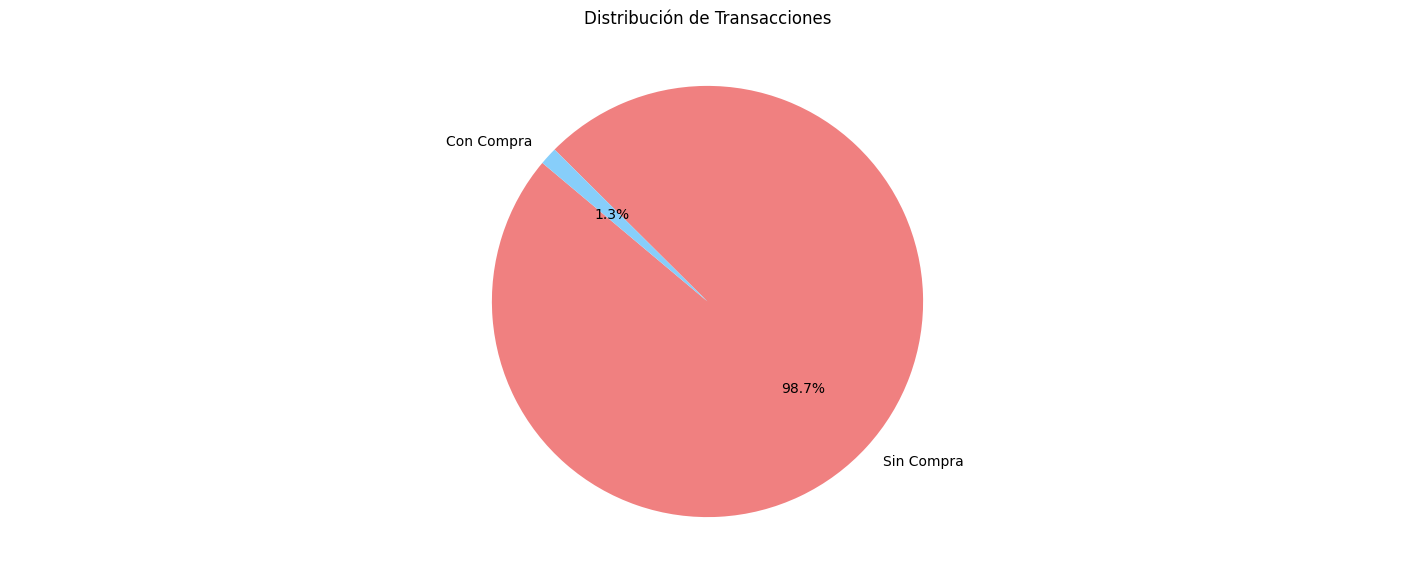

In [12]:
#Gráfico de proporciones
nm0 = len(df_traffic[df_traffic['transactionRevenue'] == 0])
m0 = len(df_traffic[df_traffic['transactionRevenue'] > 0])
print(f'Transacciones Igual a cero: {nm0}\nTransacciones Mayores a Cero: {m0}')

labels = ['Sin Compra', 'Con Compra']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(18,7))
plt.axis('equal')
plt.pie([nm0, m0], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Transacciones')
plt.show()

Vemos que sólo el **1.3% de los registros aportan una transacción**. Es un problema con inflación de ceros, algunas recomendaciones siguieren eliminar los ceros y trabajar con los valores mayores a cero, sin embargo, en este caso tenemos muy pocos registros diferentes de cero, por lo que continuaremos con todos los registros completos.

Text(0.5, 0, 'transactionRevenue')

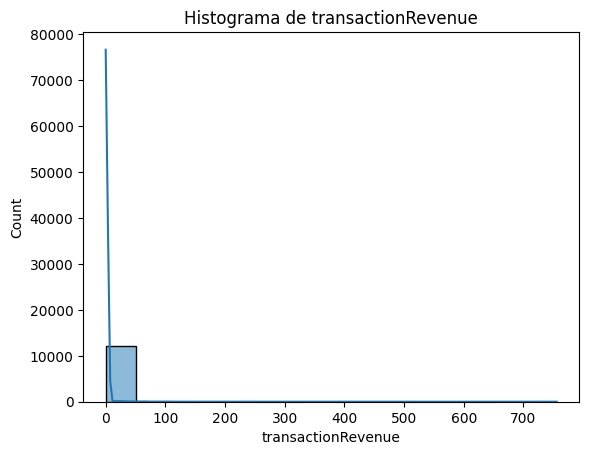

In [13]:
#Histograma (antes)
ax = sns.histplot(data=df_traffic, x='transactionRevenue', kde=True)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue')

Text(0.5, 0, 'transactionRevenue')

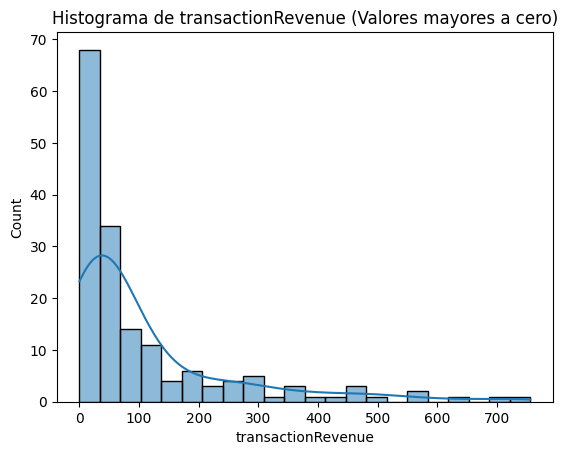

In [14]:
# Histograma (sin ceros)
ax = sns.histplot(data=df_traffic[df_traffic['transactionRevenue'] > 0], x='transactionRevenue', kde=True)
ax.set_title('Histograma de transactionRevenue (Valores mayores a cero)')
ax.set_xlabel('transactionRevenue')

En los histogramas se observa que en los registros mayores a cero, la distribución parece ser logarítmica o lognormal. Como continuaremos con todos los registros, aplicaremos una **transformación logarítmica** más adelante, observando que los registros mayores a cero se comportan de manera casi simétrica.

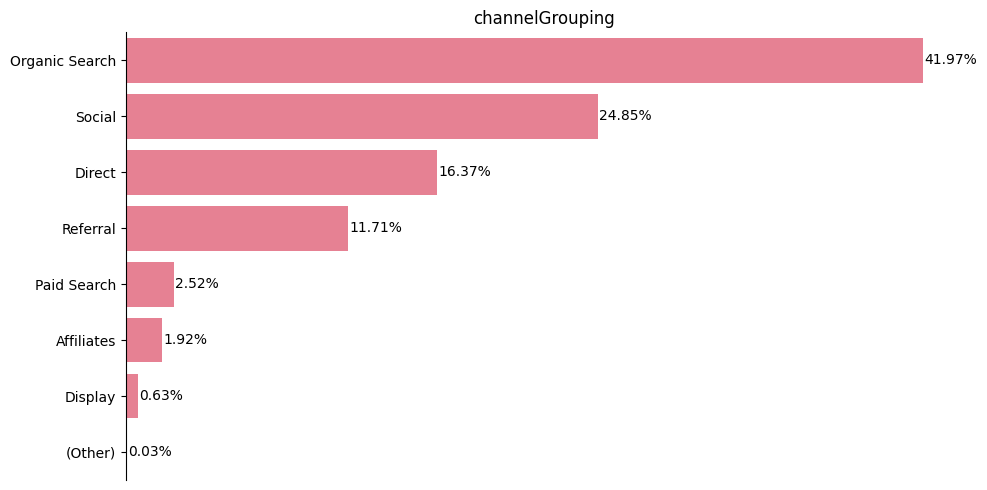

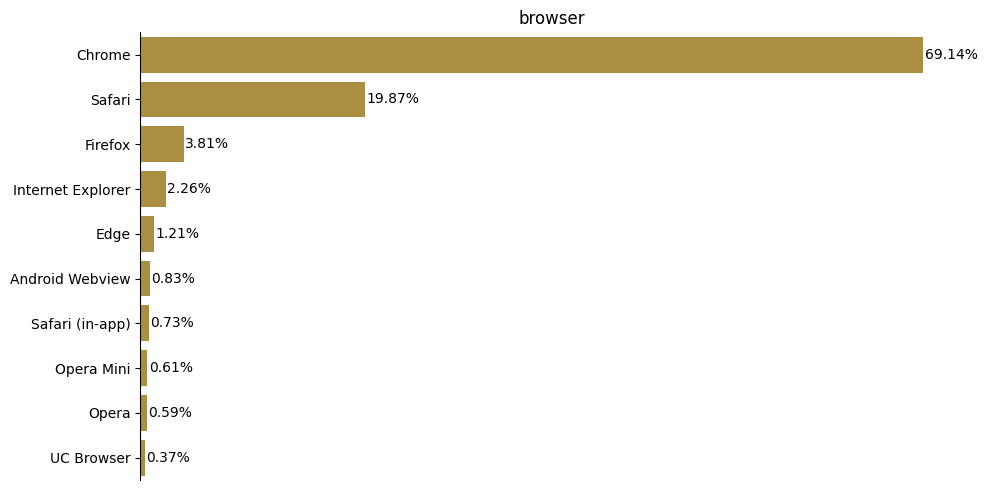

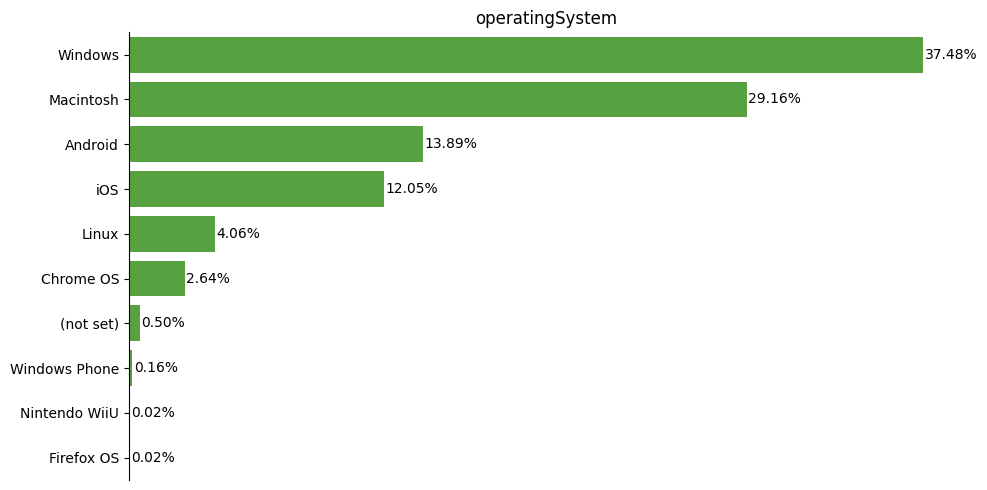

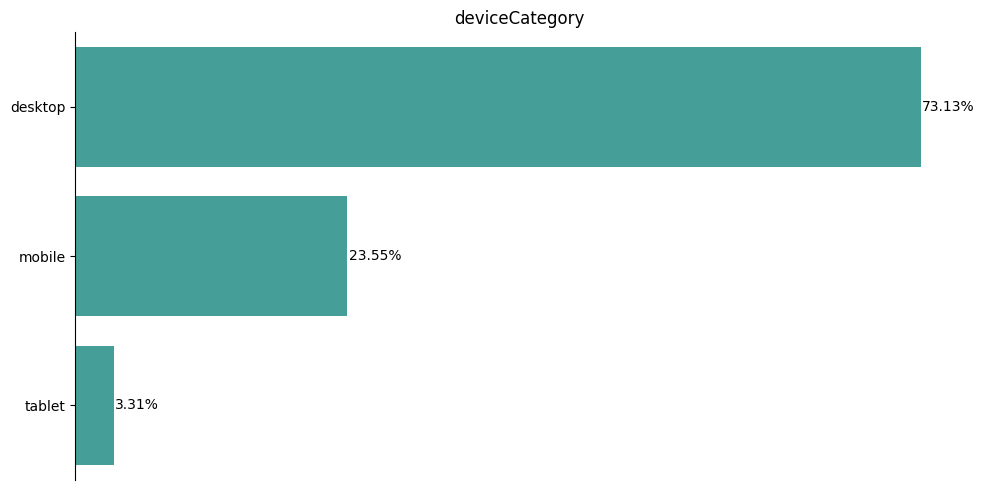

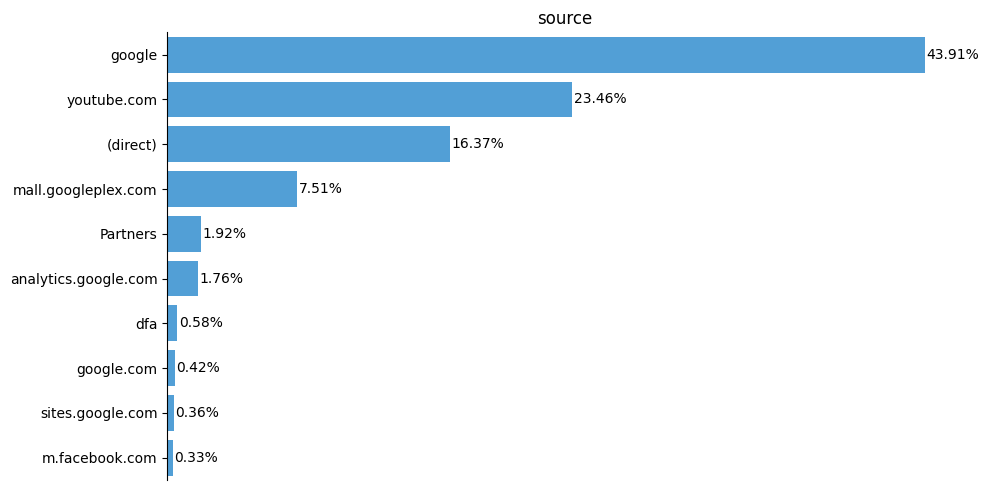

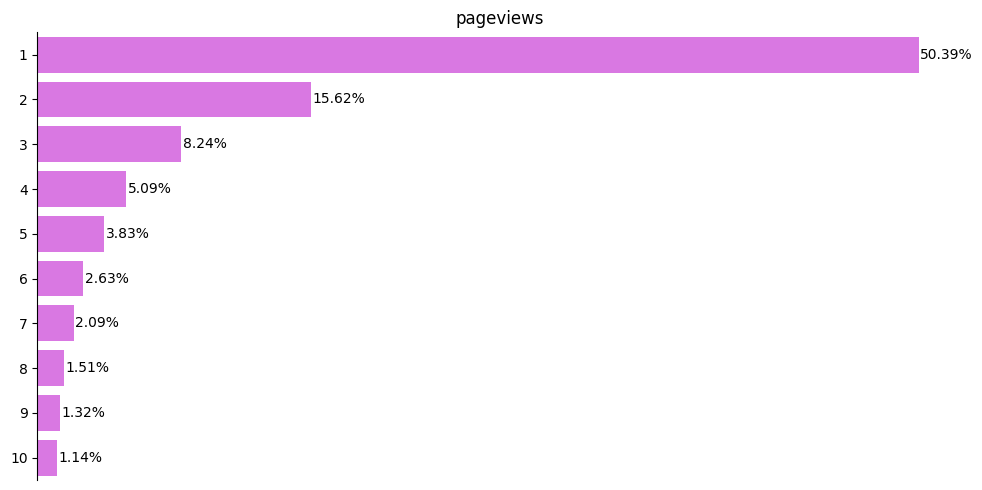

In [15]:
#Gráficos con transacciones negativas
device_columns = ['channelGrouping', 'browser', 'operatingSystem', 'deviceCategory', 'source', 'pageviews']

#Paleta de colores personalizada
custom_palette = sns.color_palette("husl", n_colors=len(device_columns))

for i, col in enumerate(device_columns, 1):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(y=df_traffic[col], order=df_traffic[col].value_counts()[:10].index, palette=custom_palette[i-1:i])

    plt.title(f'{col}')

    # Eliminar el label en el eje y
    ax.set_ylabel('')
    ax.set_xlabel('')

    # Eliminar el contorno de la derecha
    sns.despine(right=True)
    sns.despine(bottom=True)

    total = len(df_traffic[col])

    for c in ax.containers:
        percentages = [(v / total) * 100 for v in c.datavalues]
        ax.bar_label(c, labels=[f'{p:.2f}%' for p in percentages], fmt='%s', padding=1)

    # Eliminar el eje x
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.tight_layout()
    plt.subplots_adjust(hspace=5)
    plt.show()

De los gráficos anteriores podemos concluir lo siguiente:

* Las **búsquedas orgánicas y redes sociales** son la principal fuente de tráfico.
* Google Chrome es el **navegador principal** con un 69%.
* **Windows y Macintosh** son los principales sistemas operativos que utilizaron.
* Generalmente las visitas vienen desde una **computadora**.
* La mayoría de las personas va desde la página de **Google o Youtube**.
* La mitad de los registros constan de sólo **1 visita** a la página.

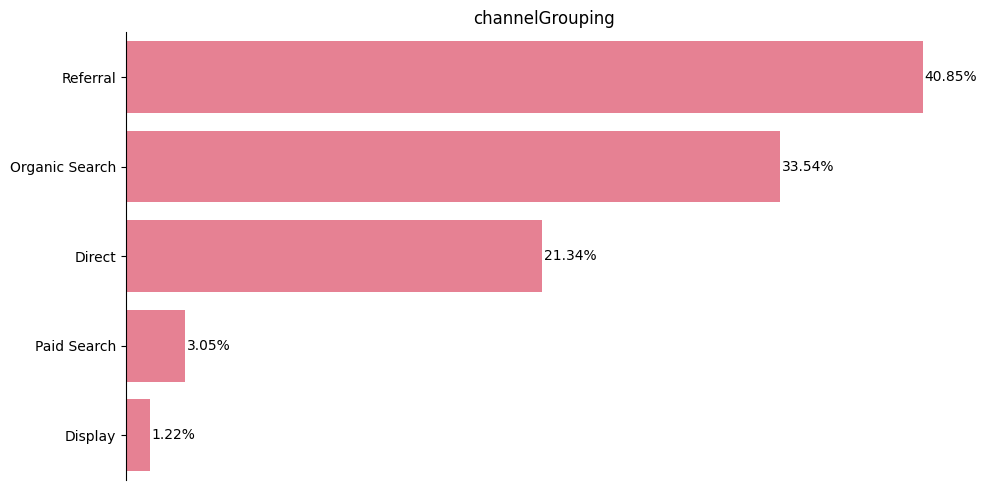

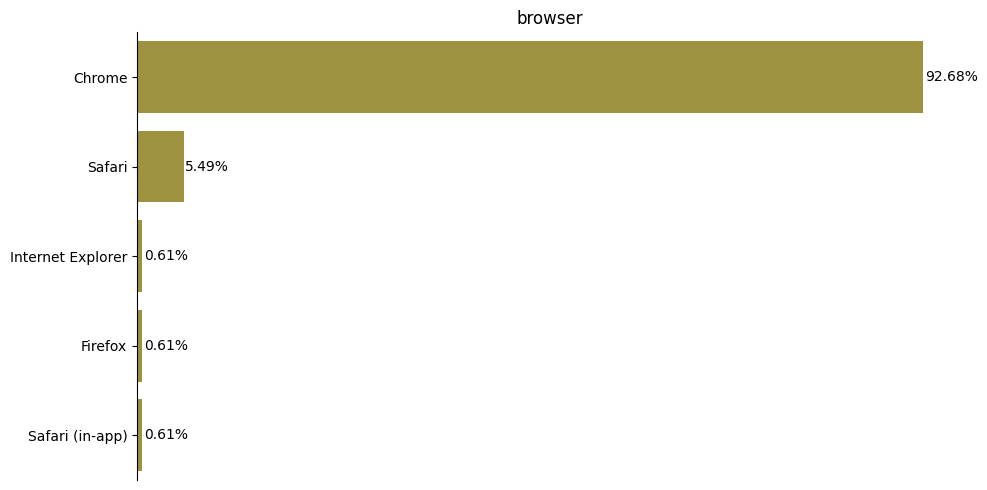

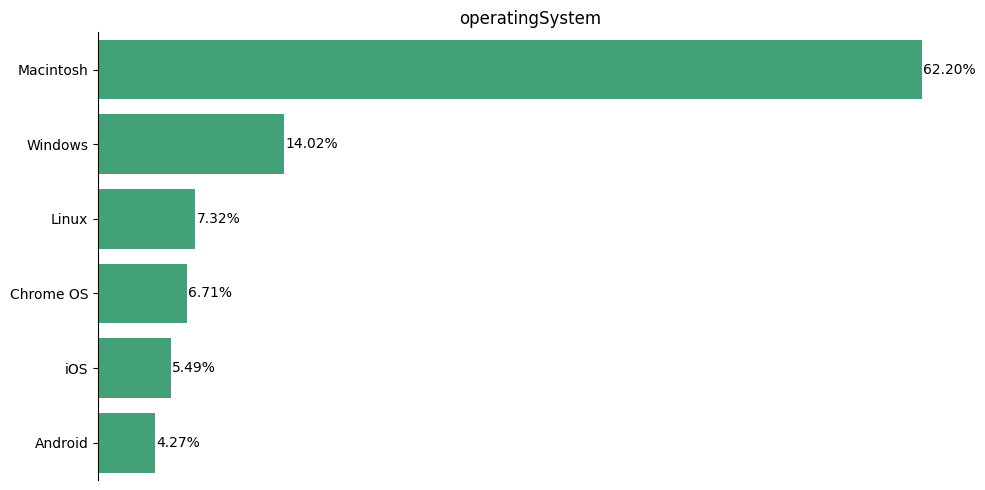

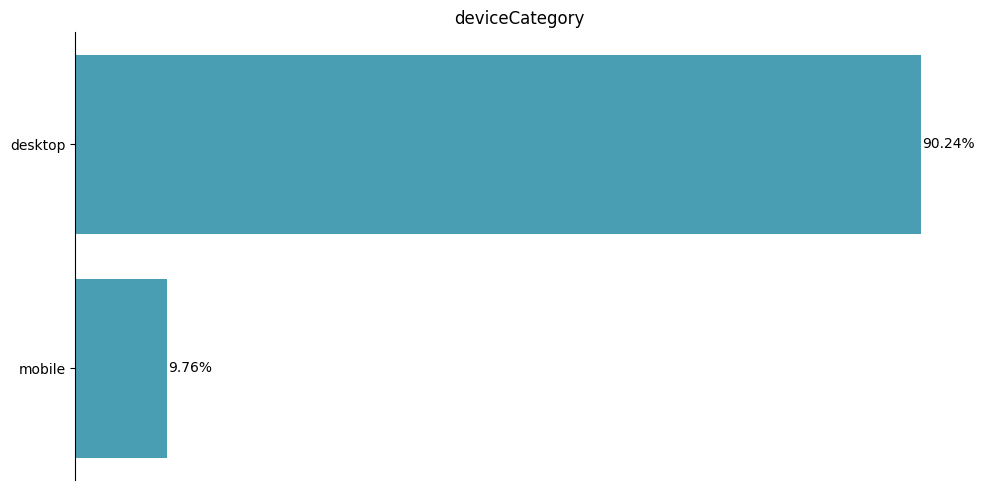

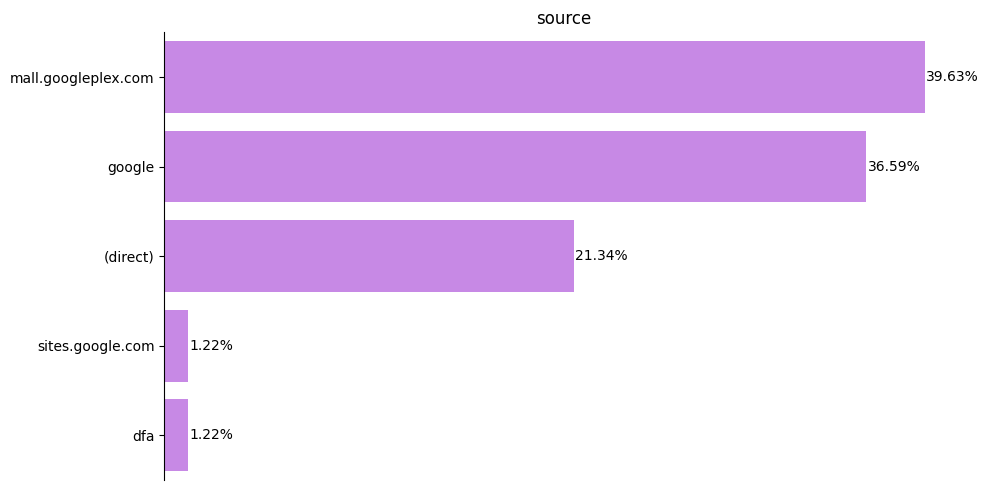

In [16]:
#Gráficos con transacciones positivas
device_columns = ['channelGrouping', 'browser', 'operatingSystem', 'deviceCategory', 'source']
custom_palette = sns.color_palette("husl", n_colors=len(device_columns))

df_positive_revenue = df_traffic[df_traffic['transactionRevenue'] > 0]

for i, col in enumerate(device_columns, 1):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(y=df_positive_revenue[col], order=df_positive_revenue[col].value_counts()[:10].index, palette=custom_palette[i-1:i])

    plt.title(f'{col}')

    ax.set_ylabel('')
    ax.set_xlabel('')

    sns.despine(right=True)
    sns.despine(bottom=True)

    total = len(df_positive_revenue[col])

    for c in ax.containers:
        percentages = [(v / total) * 100 for v in c.datavalues]
        ax.bar_label(c, labels=[f'{p:.2f}%' for p in percentages], fmt='%s', padding=1)

    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.tight_layout()
    plt.subplots_adjust(hspace=5)
    plt.show()

De las registros que hicieron alguna compra podemos concluir:

* Los **Referidos** son la principal fuente de tráfico web.
* **Chrome** sigue siendo el navegador preferido.
* Las personas con dispositivos marca **Apple** son los que más compran.
* La mayoría de transacciones vienen desde una **computadora**.
* La mayoría de personas viene de la fuente **mall.googleplex.com** que al parecer es un dominio de oficinas de Google en Mountain View, California.
* Las transacciones positivas necesitan de más de **10 visitas o recargas** de la página.

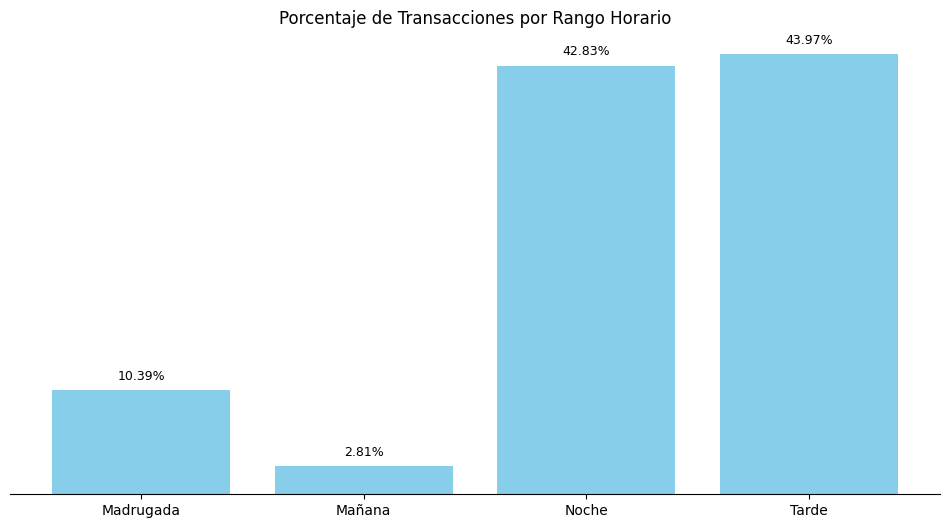

In [17]:
# Crear rango de tiempo
df_traffic['time_range'] = pd.cut(df_traffic['visitStartTime'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Madrugada', 'Mañana', 'Tarde', 'Noche'], ordered=False).astype('object')

# Agrupar por rango horario y sumar los ingresos
income_by_time = df_traffic.groupby('time_range')['transactionRevenue'].sum()

# Calcular el porcentaje del total
total_income = income_by_time.sum()
income_percentage = (income_by_time / total_income) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras con porcentajes
ax.bar(income_percentage.index, income_percentage, color='skyblue', edgecolor='none')

# Agregar los valores de porcentaje encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

# Eliminar contornos y números en el eje Y
sns.despine(right=True)
sns.despine(left=True)
ax.set_yticks([])

# Configurar el gráfico
plt.title('Porcentaje de Transacciones por Rango Horario')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

Las personas que **realizan un compra** suelen hacerlo en la **tarde y noche.** Puede estar relacionado a que es cuando disponen de tiempo libre por sus trabajos y/o estudios.

In [18]:
def feature_engineering():

  #Variables Globales
  global df_traffic

  #Separar fechas
  df_traffic['year'] = df_traffic['date'].dt.year
  df_traffic['month'] = df_traffic['date'].dt.month
  df_traffic['day'] = df_traffic['date'].dt.day
  df_traffic['week'] = df_traffic['date'].dt.isocalendar().week.astype(int)

  #Crear rango de tiempo
  df_traffic['time_range'] = pd.cut(df_traffic['visitStartTime'].dt.hour, bins=[0, 6, 12, 18, 24],
                                    labels=['madrugada', 'mañana', 'tarde', 'noche'], ordered=False).astype('object')

  #Eliminar columnas que no se utilizaràn
  df_traffic = df_traffic.drop(['date','fullVisitorId','sessionId','visitId','visitStartTime'], axis = 1)

  #Label Encoder a variables str
  cualitativas = df_traffic.dtypes[df_traffic.dtypes == object].keys()

  for columna in cualitativas:
    lbl = LabelEncoder()
    strings = list(df_traffic[columna].values.astype('str'))
    lbl.fit(strings)
    df_traffic[columna] = lbl.transform(strings)

  #Resetear indices
  df_traffic = df_traffic.reset_index(drop=True)

In [19]:
#Aplicando feature engineering
feature_engineering()
df_traffic.head()

,channelGrouping,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,region,metro,city,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue,time_range,year,month,day,week
0,4,1,5,9,0,0,114,0,0,250,0,23,5,1,1,1.0,1.0,0.0,1,2016,9,2,35
1,4,1,5,6,0,0,102,211,52,295,0,23,5,1,1,1.0,1.0,0.0,4,2016,9,2,35
2,1,1,5,6,0,0,3,27,0,43,4,3,2,1,1,1.0,1.0,0.0,3,2016,9,2,35
3,4,2,18,11,1,1,138,211,52,295,0,23,5,1,1,1.0,0.0,0.0,0,2016,9,2,35
4,4,1,18,11,1,1,138,211,52,295,0,23,5,5,4,0.0,1.0,0.0,4,2016,9,2,35


In [20]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int64  
 1   visitNumber         12283 non-null  int64  
 2   browser             12283 non-null  int64  
 3   operatingSystem     12283 non-null  int64  
 4   isMobile            12283 non-null  int64  
 5   deviceCategory      12283 non-null  int64  
 6   country             12283 non-null  int64  
 7   region              12283 non-null  int64  
 8   metro               12283 non-null  int64  
 9   city                12283 non-null  int64  
 10  campaign            12283 non-null  int64  
 11  source              12283 non-null  int64  
 12  medium              12283 non-null  int64  
 13  hits                12283 non-null  int64  
 14  pageviews           12283 non-null  int64  
 15  bounces             12283 non-null  float64
 16  newV

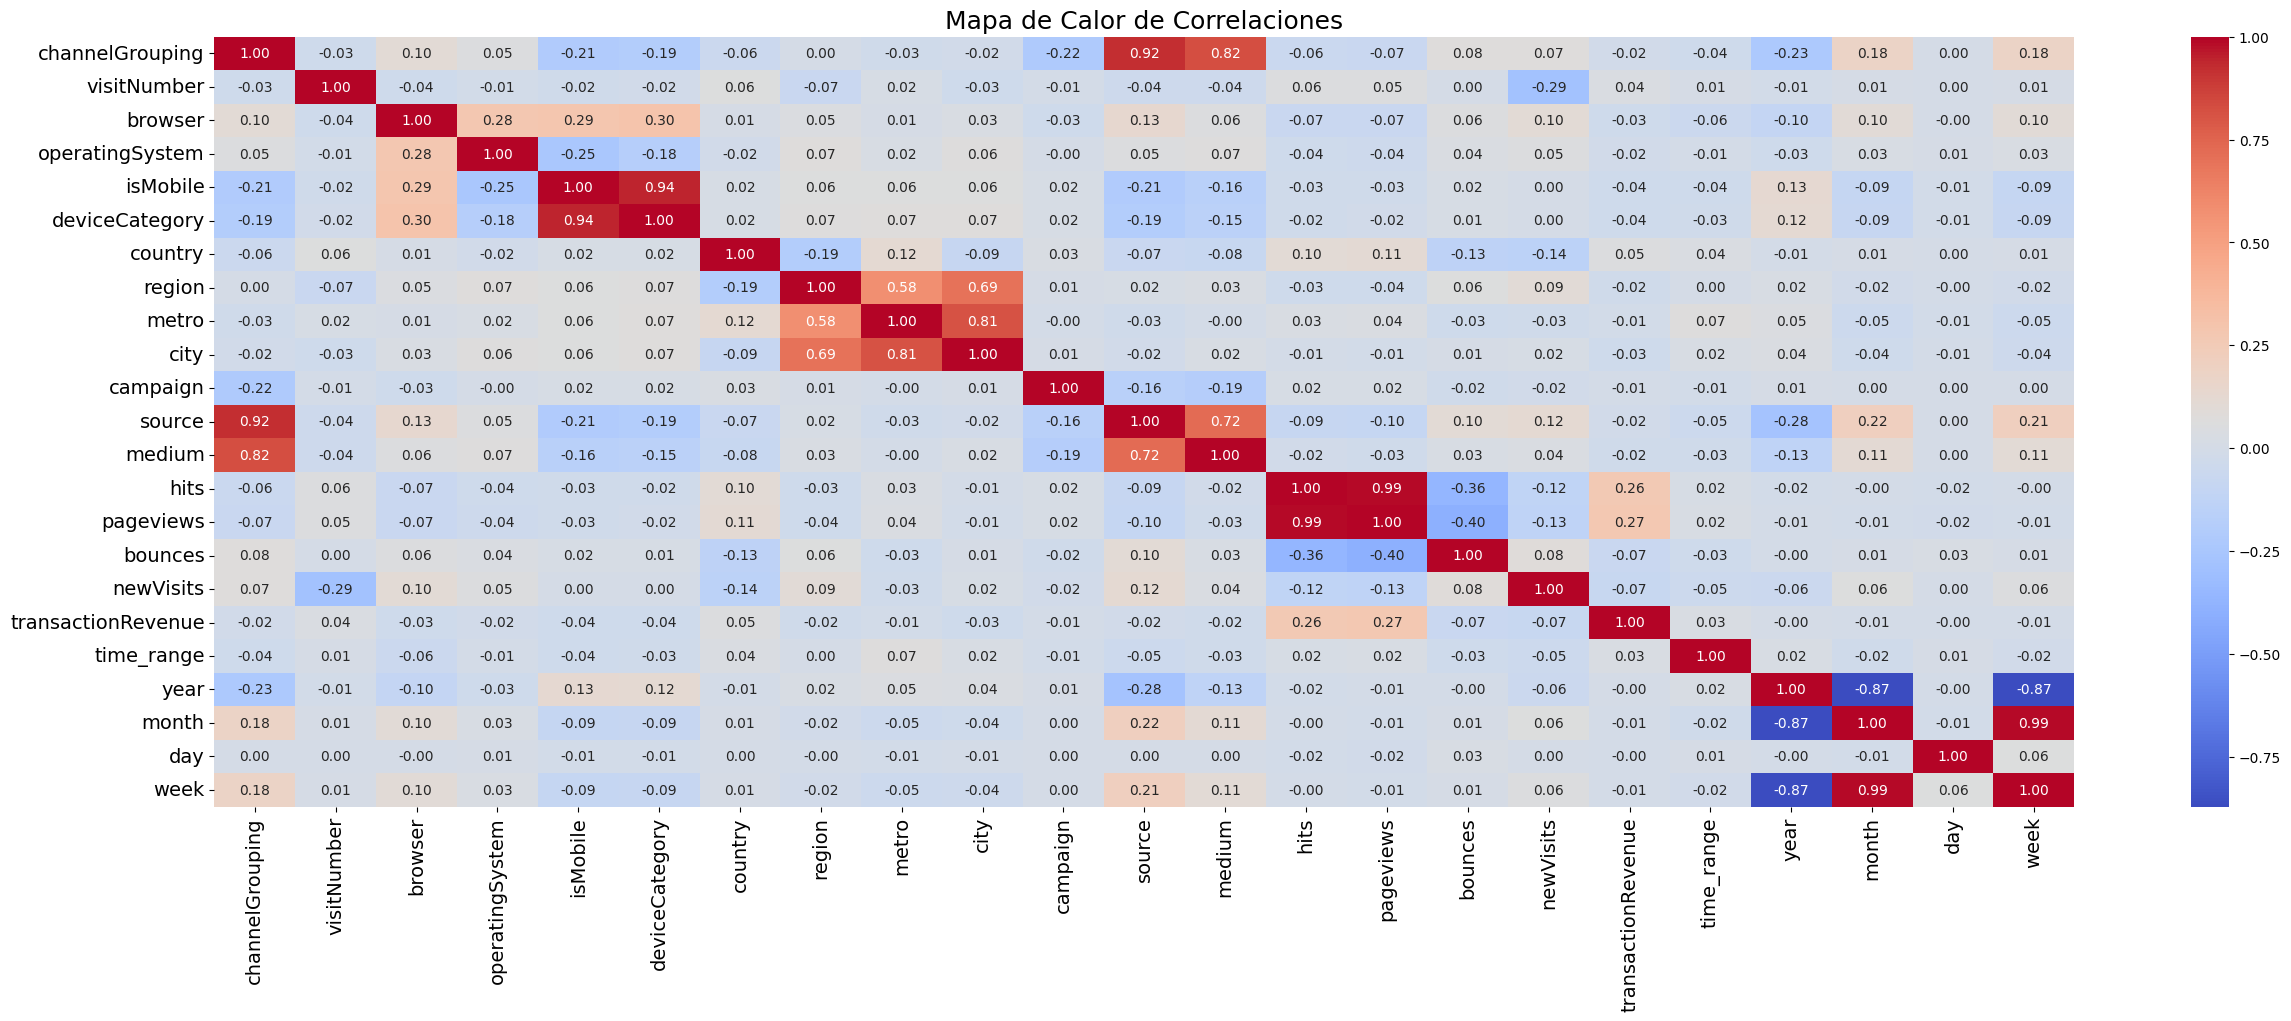

In [21]:
#Mapa de calor
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

Podemos observar **fuertes correlaciones** entre algunas variables:

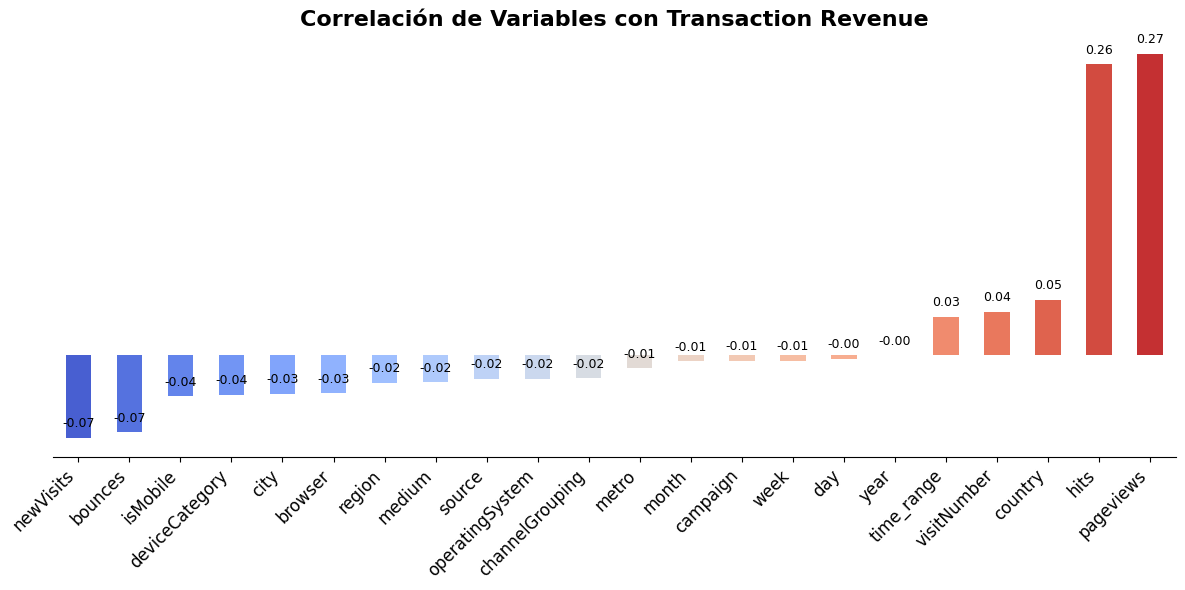

In [22]:
# Calcular la correlación y ordenar
correlation_data = df_traffic.corr()['transactionRevenue'].drop('transactionRevenue').sort_values()

fig, ax = plt.subplots(figsize=(12, 6))

correlation_data.plot(kind='bar', ax=ax, color=sns.color_palette("coolwarm", len(correlation_data)), edgecolor='none')

#Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9, color='black')

# Eliminar el eje y y los contornos
ax.set_yticks([])
sns.despine(left=True, right=True, top=True)
plt.title('Correlación de Variables con Transaction Revenue', fontsize=16, weight='bold')
ax.set_xticklabels(correlation_data.index, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

En la correlación con transaction.Revenue observamos que algunas **variables temporales no son significativas**, además de algunas otras como **metro y campaing.**

In [23]:
#Nuevo DataFrame solo con los registros mayores a cero
df_mayores_a_cero = df_traffic[df_traffic['transactionRevenue'] > 0].copy()
df_mayores_a_cero

,channelGrouping,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,region,metro,city,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue,time_range,year,month,day,week
93,6,1,5,6,0,0,138,211,52,295,0,48,6,39,28,0.0,1.0,31.49,0,2017,6,23,25
154,6,9,5,6,0,0,138,130,32,182,0,67,6,30,23,0.0,0.0,556.61,3,2016,8,11,32
193,6,3,5,6,0,0,138,199,46,245,0,48,6,18,18,0.0,0.0,13.59,4,2017,6,13,24
280,6,1,5,6,0,0,138,211,52,295,0,48,6,15,12,0.0,1.0,27.19,0,2016,11,10,45
366,6,5,5,6,0,0,138,117,14,10,0,48,6,46,38,0.0,0.0,25.90,3,2017,6,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12101,2,1,5,6,0,0,104,211,52,295,0,0,0,16,12,0.0,1.0,144.97,2,2017,4,9,14
12113,6,5,5,6,0,0,138,130,32,182,0,48,6,20,18,0.0,0.0,19.19,4,2017,3,24,12
12220,4,4,5,6,0,0,138,183,3,16,0,23,5,38,27,0.0,0.0,489.20,3,2017,5,31,22
12229,4,6,5,6,0,0,138,29,45,257,0,23,5,33,23,0.0,0.0,23.95,2,2017,7,9,27


In [24]:
df_mayores_a_cero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 93 to 12230
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     164 non-null    int64  
 1   visitNumber         164 non-null    int64  
 2   browser             164 non-null    int64  
 3   operatingSystem     164 non-null    int64  
 4   isMobile            164 non-null    int64  
 5   deviceCategory      164 non-null    int64  
 6   country             164 non-null    int64  
 7   region              164 non-null    int64  
 8   metro               164 non-null    int64  
 9   city                164 non-null    int64  
 10  campaign            164 non-null    int64  
 11  source              164 non-null    int64  
 12  medium              164 non-null    int64  
 13  hits                164 non-null    int64  
 14  pageviews           164 non-null    int64  
 15  bounces             164 non-null    float64
 16  newVi

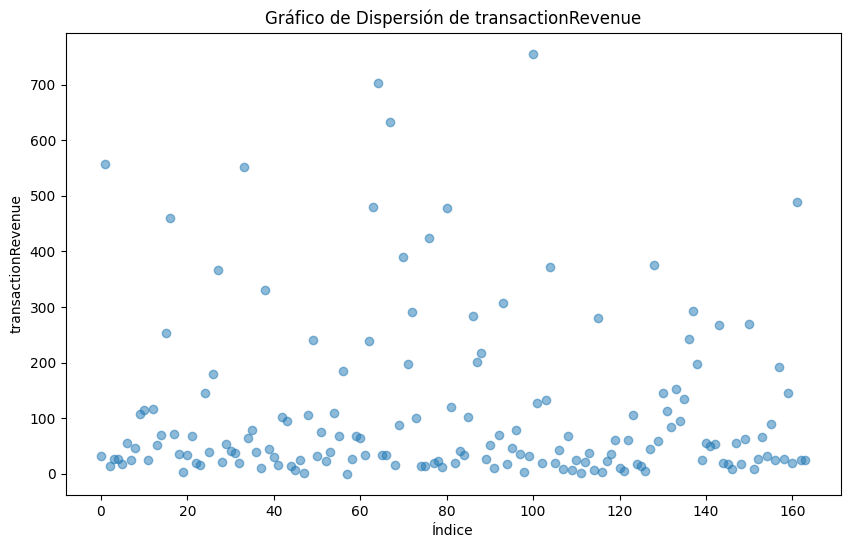

In [25]:
# Grafico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_mayores_a_cero['transactionRevenue'])), df_mayores_a_cero['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: ylabel='transactionRevenue'>

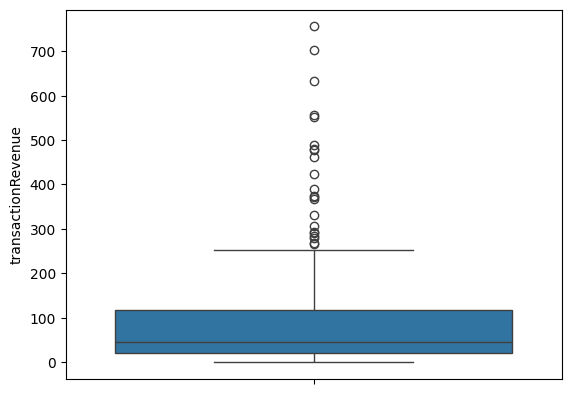

In [26]:
sns.boxplot(df_mayores_a_cero.transactionRevenue)

Text(0.5, 0, 'transactionRevenue')

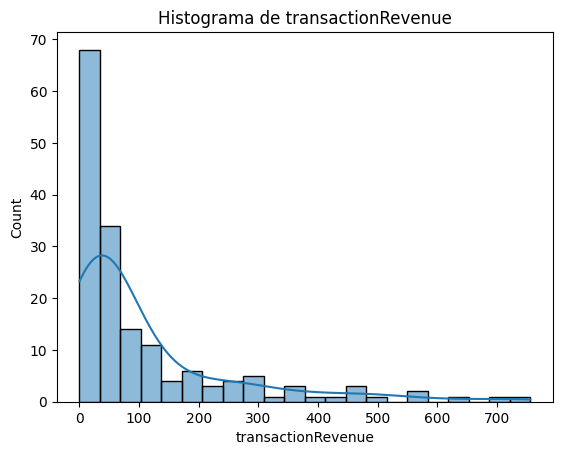

In [27]:
#Histograma
ax = sns.histplot(data=df_mayores_a_cero, x='transactionRevenue', kde=True)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue')

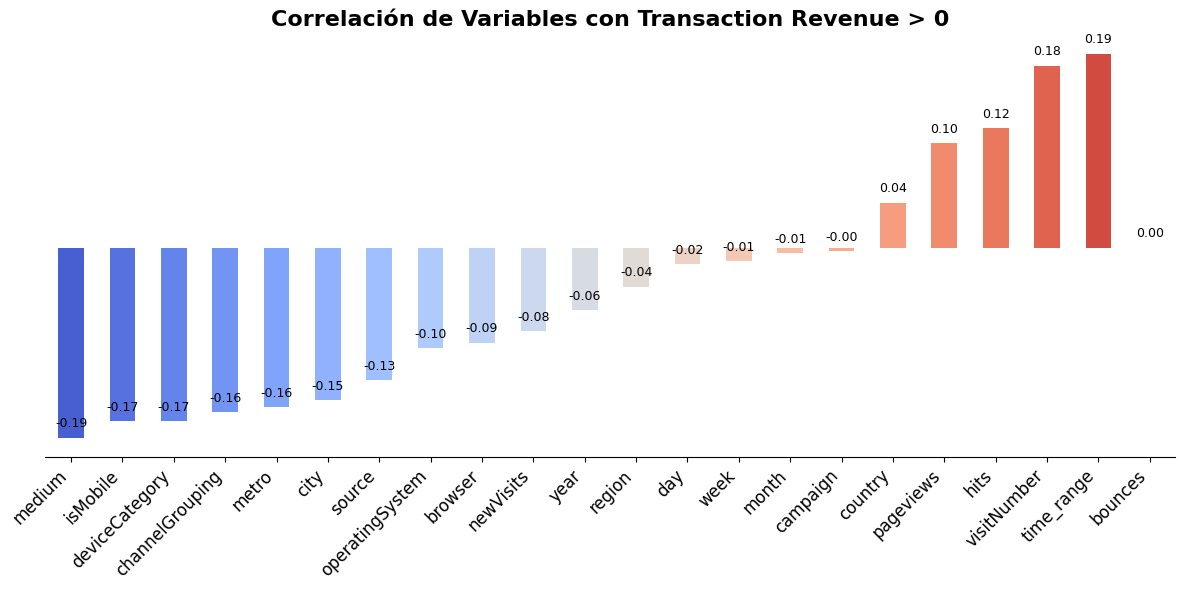

In [28]:
# Calcular la correlación y ordenar
correlation_data = df_mayores_a_cero.corr()['transactionRevenue'].drop('transactionRevenue').sort_values()

fig, ax = plt.subplots(figsize=(12, 6))

correlation_data.plot(kind='bar', ax=ax, color=sns.color_palette("coolwarm", len(correlation_data)), edgecolor='none')

#Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9, color='black')

# Eliminar el eje y y los contornos
ax.set_yticks([])
sns.despine(left=True, right=True, top=True)
plt.title('Correlación de Variables con Transaction Revenue > 0', fontsize=16, weight='bold')
ax.set_xticklabels(correlation_data.index, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

Analizando la correlación de las transacciones positivas observamos que las variables: **contry, campaign, week y month** no aportan relación.


Es momento de aplicar la transformación logarítmica a la variable objetivo

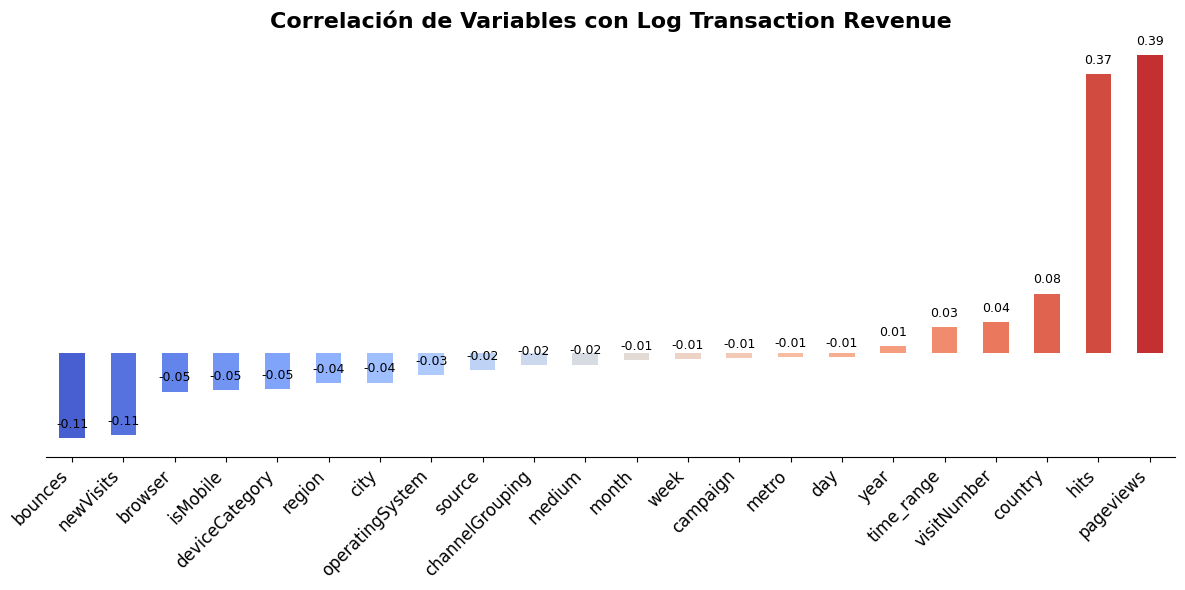

In [29]:
df_traffic['transactionRevenue'] = np.log1p(df_traffic['transactionRevenue'].values)

# Calcular la correlación y ordenar
correlation_data = df_traffic.corr()['transactionRevenue'].drop('transactionRevenue').sort_values()

fig, ax = plt.subplots(figsize=(12, 6))

correlation_data.plot(kind='bar', ax=ax, color=sns.color_palette("coolwarm", len(correlation_data)), edgecolor='none')

#Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9, color='black')

# Eliminar el eje y y los contornos
ax.set_yticks([])
sns.despine(left=True, right=True, top=True)
plt.title('Correlación de Variables con Log Transaction Revenue', fontsize=16, weight='bold')
ax.set_xticklabels(correlation_data.index, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

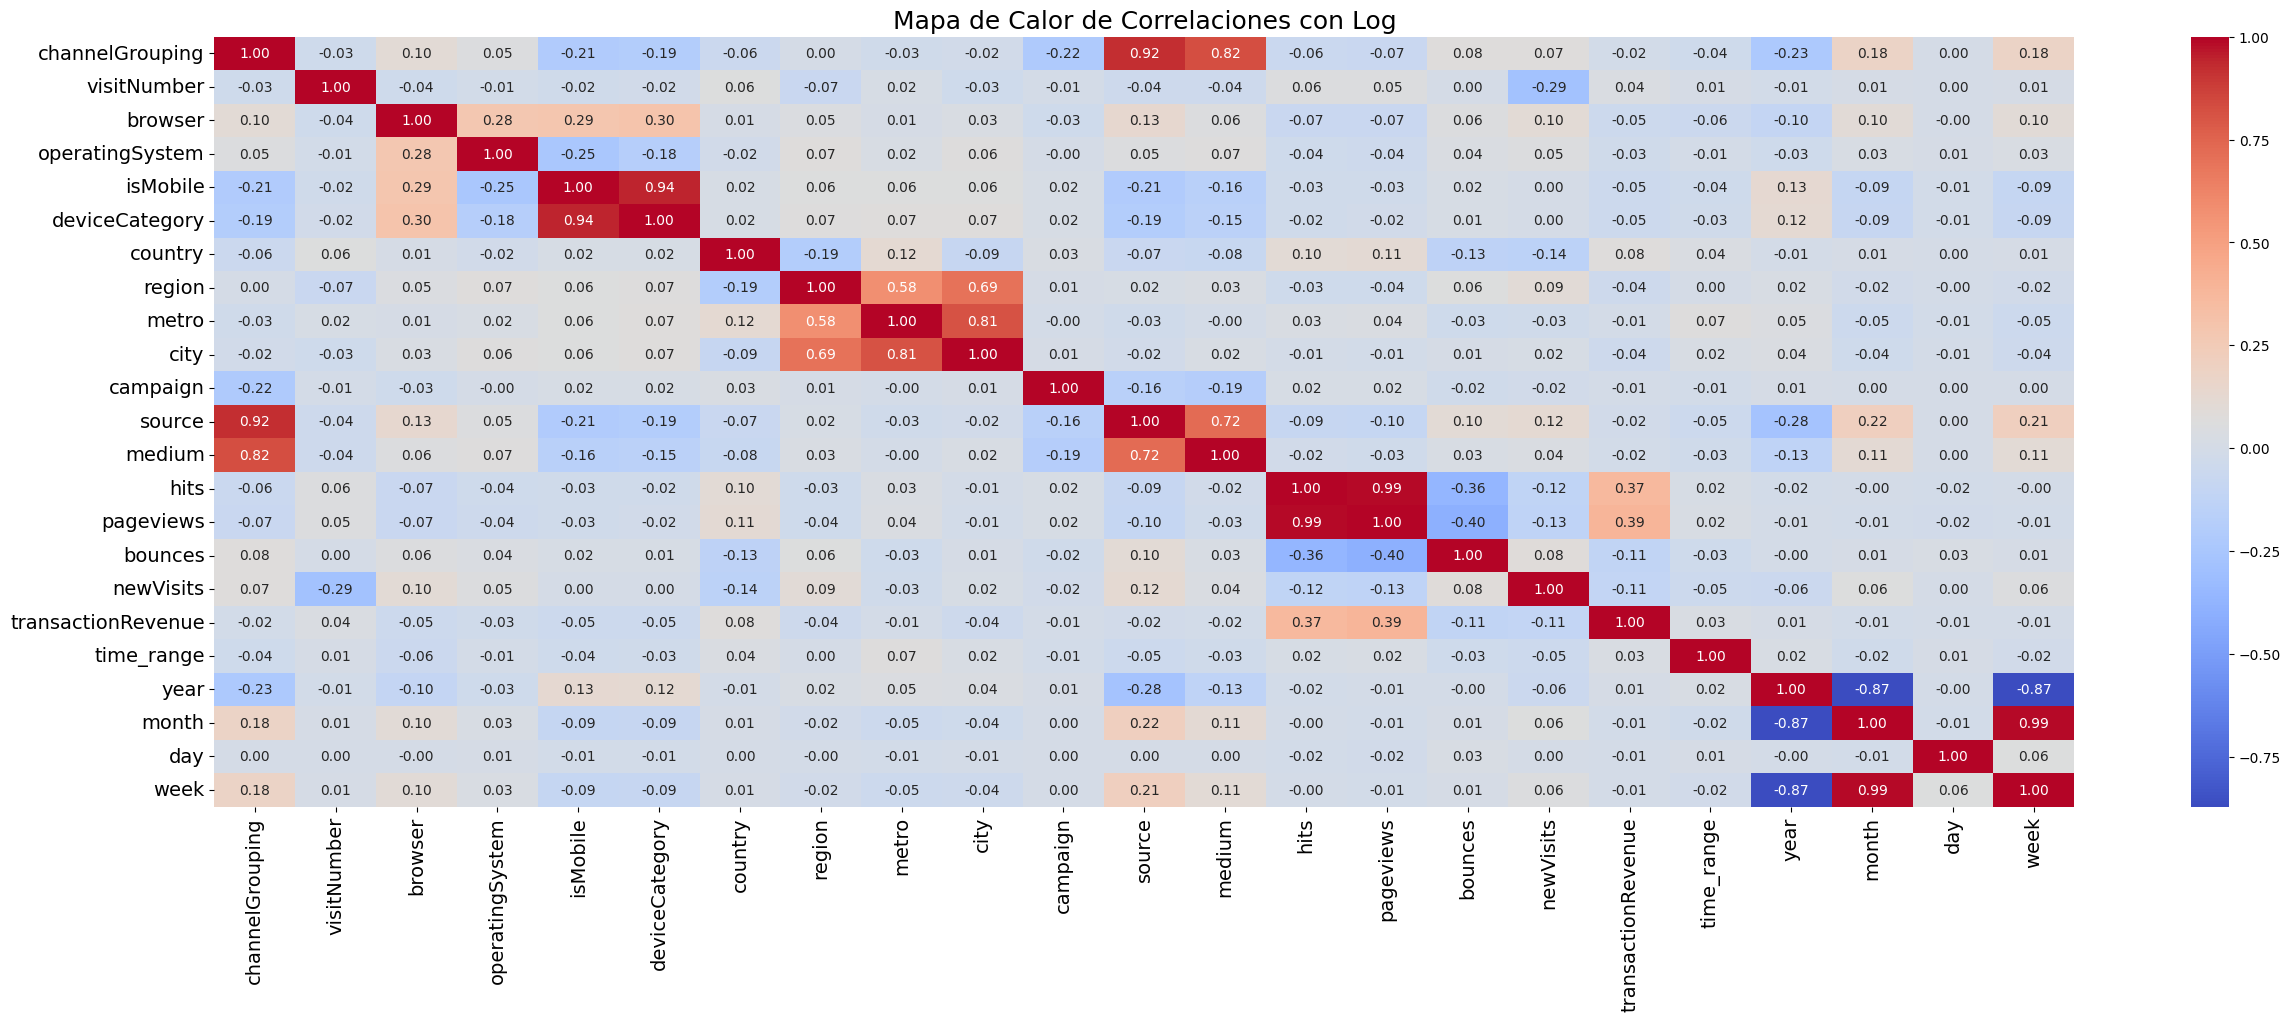

In [30]:
#Mapa de calor
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones con Log', fontsize=18)
plt.show()

In [31]:
df_traffic

,channelGrouping,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,region,metro,city,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue,time_range,year,month,day,week
0,4,1,5,9,0,0,114,0,0,250,0,23,5,1,1,1.0,1.0,0.0,1,2016,9,2,35
1,4,1,5,6,0,0,102,211,52,295,0,23,5,1,1,1.0,1.0,0.0,4,2016,9,2,35
2,1,1,5,6,0,0,3,27,0,43,4,3,2,1,1,1.0,1.0,0.0,3,2016,9,2,35
3,4,2,18,11,1,1,138,211,52,295,0,23,5,1,1,1.0,0.0,0.0,0,2016,9,2,35
4,4,1,18,11,1,1,138,211,52,295,0,23,5,5,4,0.0,1.0,0.0,4,2016,9,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,7,1,5,9,0,0,102,211,52,295,0,75,6,1,1,1.0,1.0,0.0,4,2017,1,4,1
12279,7,1,5,1,1,1,43,211,52,295,0,75,6,1,1,1.0,1.0,0.0,0,2017,1,4,1
12280,7,1,5,5,0,0,55,211,52,295,0,75,6,1,1,1.0,1.0,0.0,0,2017,1,4,1
12281,7,2,5,1,1,1,74,211,52,295,0,75,6,2,2,0.0,0.0,0.0,1,2017,1,4,1


In [32]:
df = df_traffic.copy()

In [33]:
#Calculando VIF entre características
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric = df.drop("transactionRevenue", axis=1).select_dtypes(include=[np.number])

vif = pd.DataFrame()
vif["Features"] = df_numeric.columns
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
print("VIF VALUES")
print(vif.sort_values(by="VIF", ascending=False))

VIF VALUES
           Features         VIF
19            month  363.586281
21             week  329.772193
0   channelGrouping   84.251978
18             year   62.472246
14        pageviews   52.774423
13             hits   48.034944
9              city   28.337916
11           source   19.540758
12           medium   17.977808
4          isMobile   13.894547
8             metro   13.110575
5    deviceCategory   12.772864
7            region   10.492161
3   operatingSystem    7.759094
6           country    7.628275
20              day    5.992984
16        newVisits    5.014776
2           browser    4.500862
17       time_range    3.107592
15          bounces    2.549855
1       visitNumber    1.218004
10         campaign    1.107606


VIF es un método que nos ayuda a ver si hay multicolinealidad entre características, los valores mayores a 10 presentan una extrema colinealidad.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

max_vif = 5
remove_flag = True
removed_features = []

while remove_flag:

    df_numeric = df.drop("transactionRevenue", axis=1).select_dtypes(include=[np.number])
    vif = pd.DataFrame()
    vif["Feature"] = df_numeric.columns
    vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
    max_vif_feature = vif.loc[vif['VIF'].idxmax()]

    if max_vif_feature['VIF'] > max_vif:
        removed_feature = max_vif_feature["Feature"]
        removed_features.append(removed_feature)

        df = df.drop(removed_feature, axis=1)
        print(f"Variable removida por alto VIF: {removed_feature} (VIF = {max_vif_feature['VIF']})")
    else:
        remove_flag = False

Variable removida por alto VIF: month (VIF = 363.58628124949416)
Variable removida por alto VIF: channelGrouping (VIF = 84.24957138027081)
Variable removida por alto VIF: pageviews (VIF = 52.71474199287783)
Variable removida por alto VIF: year (VIF = 41.77942273886805)
Variable removida por alto VIF: city (VIF = 25.87912341719363)
Variable removida por alto VIF: isMobile (VIF = 13.576757687280546)
Variable removida por alto VIF: medium (VIF = 10.487574657659493)
Variable removida por alto VIF: region (VIF = 8.007846642854235)
Variable removida por alto VIF: operatingSystem (VIF = 6.148148387115506)
Variable removida por alto VIF: country (VIF = 5.230653791684618)


Consideremos dejar *pageview, operatingSystem* ya que esta fuertemente relacionada con transaction Revenue.

In [35]:
removed_features

['month',
 'channelGrouping',
 'pageviews',
 'year',
 'city',
 'isMobile',
 'medium',
 'region',
 'operatingSystem',
 'country']

In [36]:
removed_features = ['month', 'year','medium', 'operatingSystem', 'isMobile', 'region', 'channelGrouping', 'pageviews']
df_traffic = df_traffic.drop(removed_features, axis =1)

Experimentando podríamos remover todas las características con VIF alto, solo algunas o ninguna, dependerá de los gustos de cada quien.

In [37]:
df_traffic

,visitNumber,browser,deviceCategory,country,metro,city,campaign,source,hits,bounces,newVisits,transactionRevenue,time_range,day,week
0,1,5,0,114,0,250,0,23,1,1.0,1.0,0.0,1,2,35
1,1,5,0,102,52,295,0,23,1,1.0,1.0,0.0,4,2,35
2,1,5,0,3,0,43,4,3,1,1.0,1.0,0.0,3,2,35
3,2,18,1,138,52,295,0,23,1,1.0,0.0,0.0,0,2,35
4,1,18,1,138,52,295,0,23,5,0.0,1.0,0.0,4,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,1,5,0,102,52,295,0,75,1,1.0,1.0,0.0,4,4,1
12279,1,5,1,43,52,295,0,75,1,1.0,1.0,0.0,0,4,1
12280,1,5,0,55,52,295,0,75,1,1.0,1.0,0.0,0,4,1
12281,2,5,1,74,52,295,0,75,2,0.0,0.0,0.0,1,4,1


In [38]:
#variables finales para el modelo
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitNumber         12283 non-null  int64  
 1   browser             12283 non-null  int64  
 2   deviceCategory      12283 non-null  int64  
 3   country             12283 non-null  int64  
 4   metro               12283 non-null  int64  
 5   city                12283 non-null  int64  
 6   campaign            12283 non-null  int64  
 7   source              12283 non-null  int64  
 8   hits                12283 non-null  int64  
 9   bounces             12283 non-null  float64
 10  newVisits           12283 non-null  float64
 11  transactionRevenue  12283 non-null  float64
 12  time_range          12283 non-null  int64  
 13  day                 12283 non-null  int64  
 14  week                12283 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.4 MB


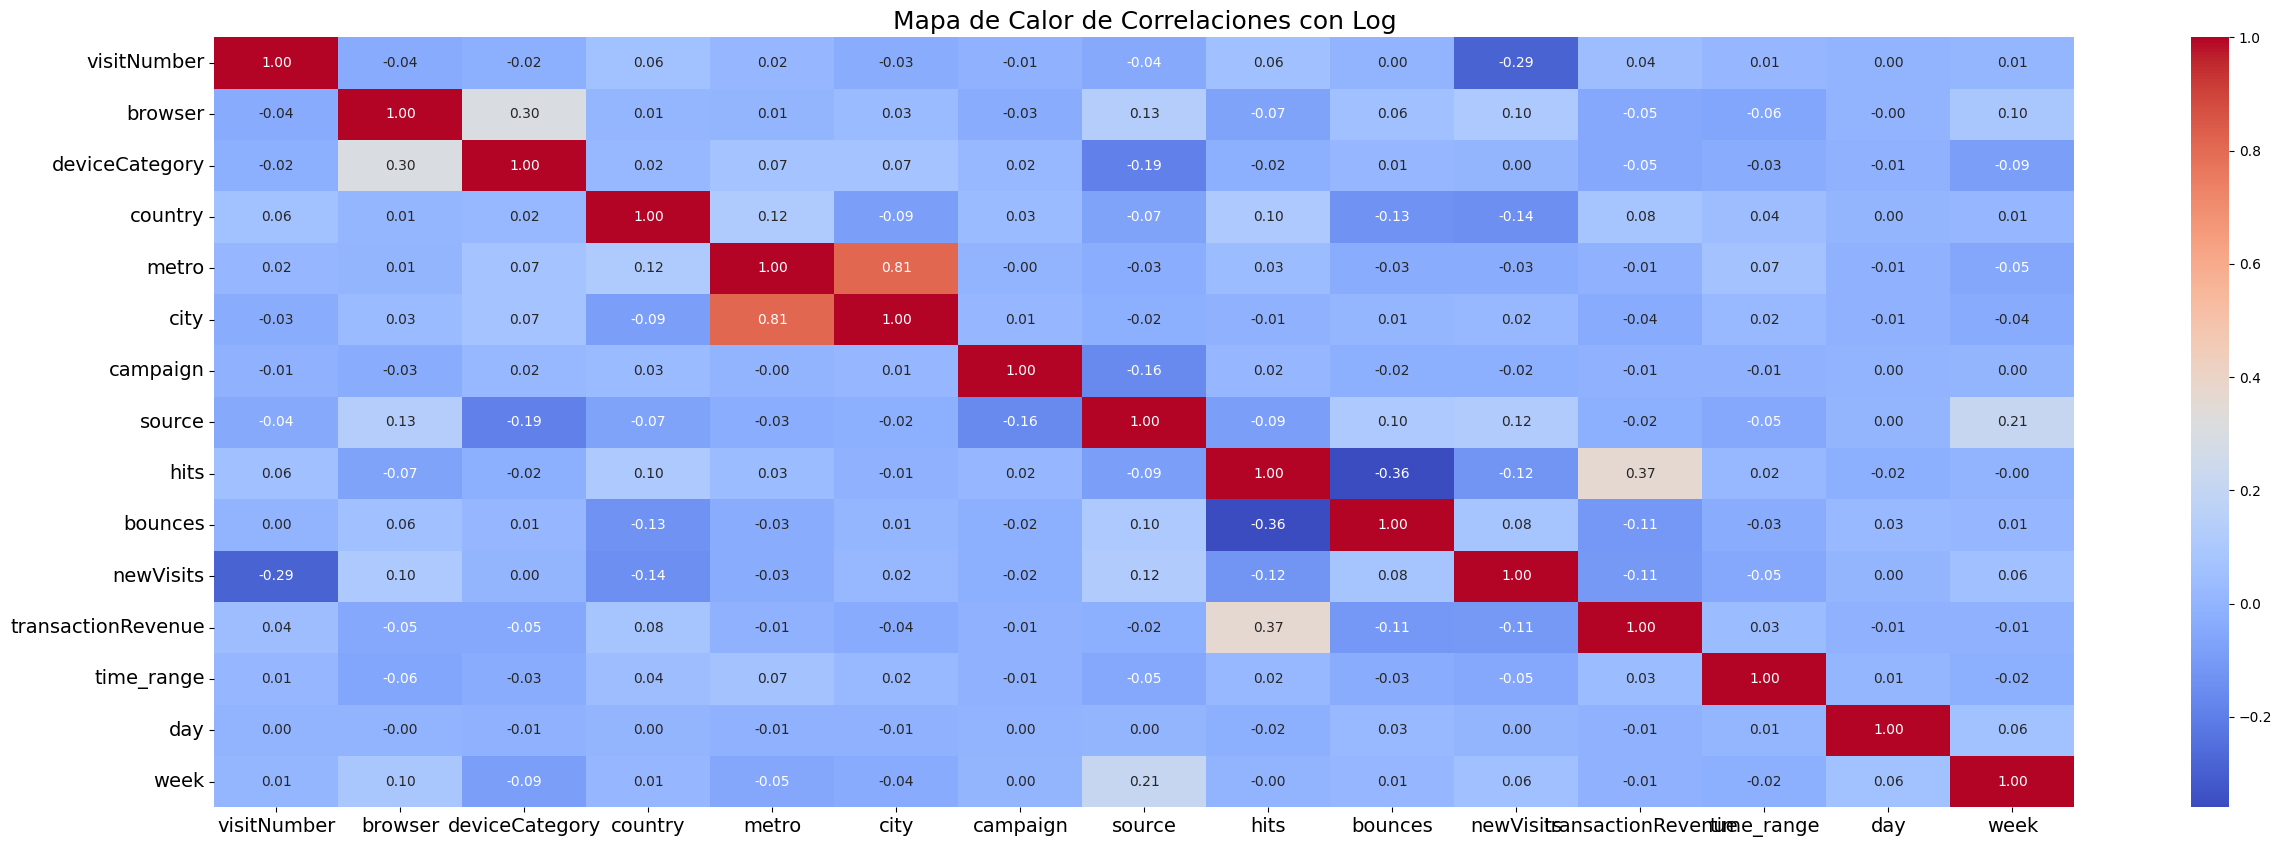

In [39]:
#Mapa de calor
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones con Log', fontsize=18)
plt.show()

#**4. Construcción de Modelos**


---


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

In [41]:
#Modelo Profe
def crea_modelos():
  global df_traffic, resultados, modelo, modelo_clasificacion, df_predicciones

  #Listas para almanecar los valores
  nombre_modelo = []
  r_2 = []
  MSE = []
  RMSE = []
  MAE = []
  feature_importances = []
  modelos_entrenados = []

  #Modelo Clasificación
  X = df_traffic.drop('transactionRevenue', axis = 1)
  y = df_traffic['transactionRevenue'].apply(lambda x: 0 if x == 0 else 1)

  #Normalizar datos antes de división
  norm = StandardScaler()
  X_normalizado = norm.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state = 42)
  model_clasi = RandomForestClassifier(n_estimators=100, random_state=42)
  model_clasi.fit(X_train, y_train)
  modelo_clasificacion = model_clasi

  # Obtener predicciones del modelo de clasificación
  y_pred_clasificacion = model_clasi.predict(X_test)

  # Métricas de evaluación para el modelo de clasificación
  accuracy = accuracy_score(y_test, y_pred_clasificacion)
  classification_report_str = classification_report(y_test, y_pred_clasificacion)
  conf_matrix = confusion_matrix(y_test, y_pred_clasificacion)

  # Imprimir métricas de evaluación del modelo de clasificación
  print(f'Accuracy: {accuracy}')
  print(f'Classification Report:\n{classification_report_str}')
  print(f'Confusion Matrix:\n{conf_matrix}')

  #Modelo Regresión
  X = df_traffic.drop('transactionRevenue', axis = 1)
  X['Clasificacion'] = model_clasi.predict(X)
  feature_names = X.columns.tolist()  # Obtener nombres de características
  y = df_traffic.transactionRevenue.copy()

  #Normalizar datos antes de división
  norm = StandardScaler()
  X_normalizado = norm.fit_transform(X)

  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 42)

  #df con predicciones
  df_predicciones = pd.DataFrame({'Real': test_y})

  #Modelo LGB
  lgb_params = {'objective':'regression', 'metric':'rmse', 'num_leaves':50, 'learning_rate':0.01, 'bagging_fraction':0.75, 'feature_fraction':0.8,
            'bagging_frecuency':5, 'force_row_wise':True, 'verbose':-1, 'predict_disable_shape_check':True}

  lgb_train = lgb.Dataset(train_x, label = train_y)
  lgb_val = lgb.Dataset(test_x, label = test_y)
  lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round = 700, valid_sets = [lgb_val], callbacks = [lgb.early_stopping(stopping_rounds = 500)])

  #Modelo XGBoost
  params = {'objective':'reg:squarederror', 'eval_metric':'rmse', 'eta':0.1, 'max_depth':6, 'subsample':0.7, 'colsample_bytree':0.7, 'seed':42}

  dtrain = xgb.DMatrix(train_x, label = train_y)
  dtest = xgb.DMatrix(test_x, label = test_y)
  evals = [(dtrain, 'train'), (dtest, 'test')]
  xgb_model = xgb.train(params, dtrain, num_boost_round = 1000, evals=evals, early_stopping_rounds = 10, verbose_eval = False)

  #Modelos
  modelos = [
        ('Regresión Lineal', LinearRegression()),
        ('Random Forest', RandomForestRegressor()),
        ('XGBoost', xgb_model),
        ('LightGBM', lgb_model)]

  for nombre, model in modelos:
    if nombre == 'LightGBM':
      predictions = model.predict(test_x, num_iteration = model.best_iteration)
      predictions[predictions < 0] = 0
      modelo = model
    elif nombre == 'XGBoost':
      predictions = model.predict(dtest)
      predictions[predictions < 0] = 0
      modelo = model
    elif nombre == 'Random Forest':
      param_dist = {'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)], 'max_features':['sqrt'],
                    'max_depth':[int(x) for x in np.linspace(10,110, 11)] + [None], 'min_samples_split': [2,5,10],
                    'min_samples_leaf': [1,2,4], 'bootstrap': [True, False]}
      random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, scoring='r2', random_state=42)
      random_search.fit(train_x, train_y)
      model = random_search.best_estimator_
      modelo = model
    else:
      #Entrenando modelo
      model.fit(train_x, train_y)

      #Predicciones
      predictions = model.predict(test_x)
      predictions[predictions < 0] = 0

    #Almacenamos las predicciones en el DataFrame
    df_predicciones[nombre] = predictions

    #Métricas de evaluación
    r2 = r2_score(test_y, predictions)*100
    mse = mean_squared_error(test_y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y, predictions)


    #Obtener feature_importances_ y nombres de características
    if hasattr(model, 'feature_importances_'):
      feature_importances.append(dict(zip(feature_names, model.feature_importances_)))
    else:
      feature_importances.append(None)

    #Almacenar valores en listas
    modelos_entrenados.append(model)
    nombre_modelo.append(nombre)
    r_2.append(r2)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE.append(mae)

    #Resultados
    resultados = {
    'Nombre_Modelo': nombre_modelo,
    'R2': r_2,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'Feature_Importances': feature_importances}

  dump(lgb_model, 'gbm_model.joblib')  # Aquí guarda el modelo de LightGBM con el nombre 'gbm_model.joblib'
  dump(modelo_clasificacion, 'modelo_clasificacion.joblib')

In [42]:
crea_modelos()
for i, model in enumerate(resultados['Nombre_Modelo']):
    print('-------------------------------')
    print(f"Modelo: {model}")
    print(f"R-cuadrado (R²): {resultados['R2'][i]}")
    print(f"Error cuadrático medio (MSE): {resultados['MSE'][i]}")
    print(f"Raíz del error cuadrático medio (RMSE): {resultados['RMSE'][i]}")
    print(f"MAE: {resultados['MAE'][i]}")
    print(f"Features importances: {resultados['Feature_Importances'][i]}")
    print('-------------------------------')

Accuracy: 0.98561736770692
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3635
           1       0.36      0.08      0.13        50

    accuracy                           0.99      3685
   macro avg       0.68      0.54      0.56      3685
weighted avg       0.98      0.99      0.98      3685

Confusion Matrix:
[[3628    7]
 [  46    4]]
Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[256]	valid_0's rmse: 0.407991
-------------------------------
Modelo: Regresión Lineal
R-cuadrado (R²): 15.482724975333827
Error cuadrático medio (MSE): 0.18318707611981513
Raíz del error cuadrático medio (RMSE): 0.42800359358282863
MAE: 0.10424051745204413
Features importances: None
-------------------------------
-------------------------------
Modelo: Random Forest
R-cuadrado (R²): 15.482724975333827
Error cuadrático medio (MSE): 0.18318707611981513
Raíz del e

In [52]:
df_predicciones[df_predicciones['Real']>0].sample(50)

,Real,Regresión Lineal,Random Forest,XGBoost,LightGBM
4614,3.511247,0.296486,0.296486,0.407298,0.590119
9434,2.396986,0.341478,0.341478,0.283452,0.144185
93,3.480932,0.583288,0.583288,0.640243,0.931671
7189,4.638121,0.862375,0.862375,0.902897,1.499984
4442,2.078191,0.113561,0.113561,0.000000,0.073986
4525,4.667957,0.688703,0.688703,1.626656,2.229629
11501,2.196113,0.271305,0.271305,1.034895,0.424691
11413,2.889816,0.391600,0.391600,0.541840,0.618772
9951,5.929190,0.350901,0.350901,0.532908,0.866813
1785,3.543565,0.529900,0.529900,1.382642,1.405286


In [55]:
np.expm1(df_predicciones[df_predicciones['Real']>0].sample(50))

,Real,Regresión Lineal,Random Forest,XGBoost,LightGBM
7316,200.89,1.151946,1.151946,7.400563,12.992196
7189,102.35,1.368779,1.368779,1.466738,3.481617
6931,40.52,2.679248,2.679248,11.668357,4.696250
10494,134.32,0.726148,0.726148,2.814394,11.819468
1786,67.18,0.784475,0.784475,1.177186,0.543151
5379,67.54,0.470251,0.470251,0.236620,0.057462
4972,38.38,0.568641,0.568641,0.122610,0.512416
4162,15.99,0.300902,0.300902,0.540843,0.478544
11938,27.18,2.547138,2.547138,2.747154,1.859331
10890,49.99,0.500802,0.500802,2.253754,1.810597


#**5. Evaluación y Selección del Modelo**


---


In [45]:
def visualiza_resultados():
    global resultados

    results_df = pd.DataFrame(resultados)
    results_df = results_df.iloc[:, :-1]
    results_df.set_index('Nombre_Modelo', inplace=True)

    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD']
    ax = results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors, width=0.8)

    # Añadir etiquetas de valor encima de cada barra
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title('Comparación de Métricas por Modelo')
    #plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')

    # Eliminar números en el eje y
    ax.get_yaxis().set_visible(False)

    # Eliminar bordes de los lados y la parte superior
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

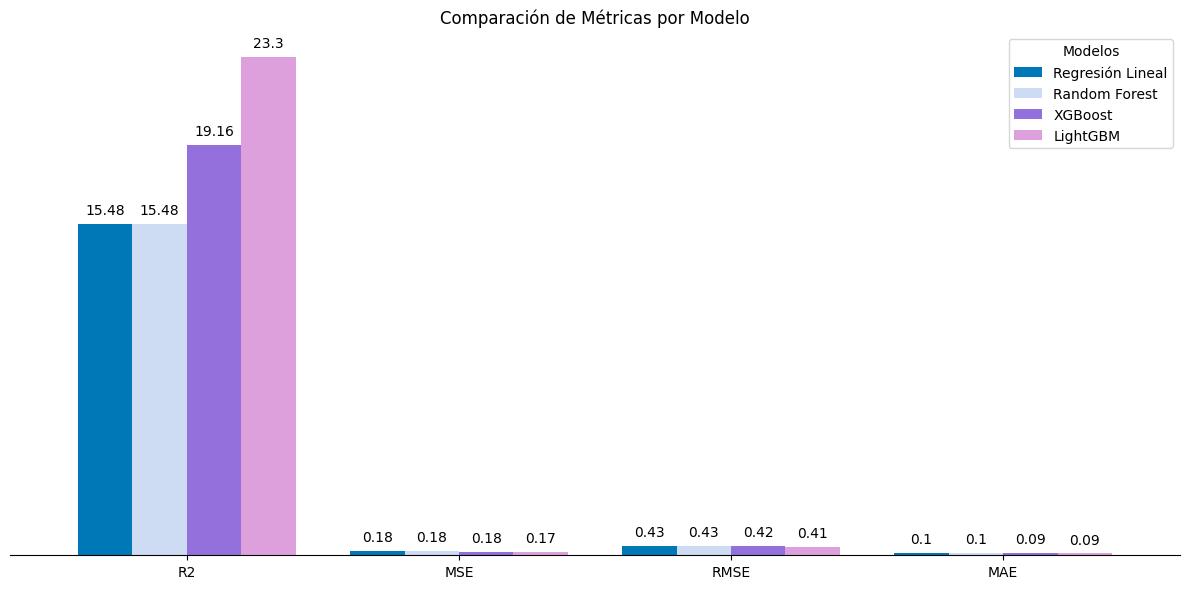

In [46]:
visualiza_resultados()

#**6. Producción**


---


In [47]:
#Importando la base de datos
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_test.csv')
preprocesamiento()
feature_engineering()
removed_features = ['month', 'year','medium', 'operatingSystem', 'isMobile', 'region', 'channelGrouping', 'pageviews']
df_traffic = df_traffic.drop(removed_features, axis=1)
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitNumber         1002 non-null   int64  
 1   browser             1002 non-null   int64  
 2   deviceCategory      1002 non-null   int64  
 3   country             1002 non-null   int64  
 4   metro               1002 non-null   int64  
 5   city                1002 non-null   int64  
 6   campaign            1002 non-null   int64  
 7   source              1002 non-null   int64  
 8   hits                1002 non-null   int64  
 9   newVisits           1002 non-null   float64
 10  bounces             1002 non-null   float64
 11  transactionRevenue  1002 non-null   float64
 12  day                 1002 non-null   int64  
 13  week                1002 non-null   int64  
 14  time_range          1002 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 117.5 KB


In [50]:
#Cargar el modelo entrenado
modelo = load('gbm_model.joblib')
modelo_clasificacion = load('modelo_clasificacion.joblib')

#Pronosticar con la nueva base
X = df_traffic.drop('transactionRevenue',axis=1)
X['clasificacion'] = modelo_clasificacion.predict(X)
y = df_traffic.transactionRevenue.copy()

predictions = modelo.predict(X)
predictions[predictions < 1] = 0

#Genera algunas métricas de evaluación de los pronosticos
r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"R-cuadrado (R²): {r2*100}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

R-cuadrado (R²): 27.007136411980603
Error cuadrático medio (MSE): 387.46827215655844
Raíz del error cuadrático medio (RMSE): 19.684213780503363


In [64]:
#Ejemplos de los pronósticos
df_resultados = pd.DataFrame({
    'transactionRevenue': y,
    'predictions': np.expm1(predictions)
})
df_resultados[df_resultados.transactionRevenue>0].sample(10)

,transactionRevenue,predictions
238,27.19,1.840576
276,66.96,0.000000
832,19.19,2.015227
657,27.18,3.731708
939,489.20,6.916943
220,7.99,0.000000
820,144.97,0.000000
487,31.49,3.460046
192,269.55,0.000000
949,25.24,10.870407


#**6. Conclusiones**


---


Para este proyecto de Regresión Lineal con Machine Learning, por la distribución de los datos nos enfocamos en las métricas de los errores (RMSE,MSE, MAE), obteniendo el error mas bajo en el modelo LightGBM con un MSE: 0.40 y un R Cuadrado de 23, el cual fue el más alto pero no es lo más apropiado para un modelo de regresión lineal.

Nos quedamos con el modelo GBM, pero dejamos algunas cosas que se pueden hacer para mejorar el modelo:

* Recopilar más datos de las transacciones mayores a cero para que haya un equilibrio.
* Experimentar con los hiperparámetros de los modelos.
* Adaptar Crossvalidation a los modelos.
* Experimentar con diferentes características de entrada para el modelo.


